# 1.1 Niveles Lingüísticos I

<a target="_blank" href="https://colab.research.google.com/github/umoqnier/cl-2026-2-lab/blob/main/notebooks/1_niveles_linguisticos_I.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Objetivos

- Trabajar tareas a diferentes niveles lingüísticos (Fonético, Morfólogico, Sintáctico)
- Manipular y recuper información de datasets disponibles en Github para resolver tareas de NLP
- Comparar enfoques basados en reglas y estadísticos para el análisis morfológico

## Fonética y Fonología

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/IPA_chart_2020.svg/660px-IPA_chart_2020.svg.png" width=500></center

In [1]:
from IPython.display import YouTubeVideo

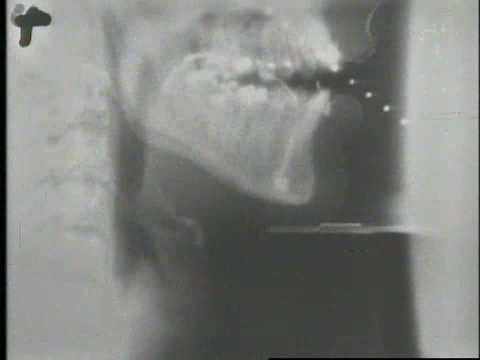

In [2]:
YouTubeVideo("DcNMCB-Gsn8", width=960, height=615)

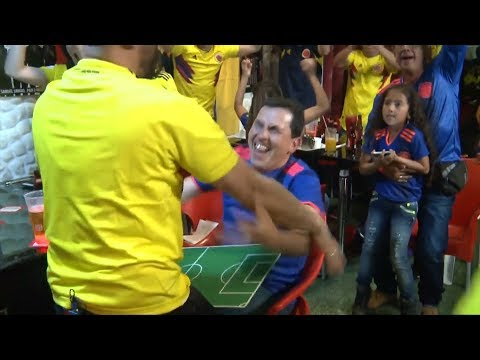

In [3]:
YouTubeVideo("74nnLh0Vdcc", width=960, height=615)

In [4]:
import http
from collections import defaultdict

import pandas as pd
import requests as r

from rich import print as rprint
from rich.columns import Columns
from rich.panel import Panel
from rich.text import Text

### International Phonetic Alphabet (IPA)

- Las lenguas naturales tienen muchos sonidos diferentes por lo que necesitamos una forma de describirlos independientemente de las lenguas
- IPA es una representación escrita de los [sonidos](https://www.ipachart.com/) del [habla](http://ipa-reader.xyz/)

### Dataset: [IPA-dict](https://github.com/open-dict-data/ipa-dict) de open-dict

- Diccionario de palabras para varios idiomas con su representación fonética
- Representación simple, una palabra por renglon con el formato:

```
[PALABRA][TAB][IPA]

Ejemplos
mariguana	/maɾiɣwana/
zyuganov's   /ˈzjuɡɑnɑvz/, /ˈzuɡɑnɑvz/
```

- [ISO language codes](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes)
- URL: `https://raw.githubusercontent.com/open-dict-data/ipa-dict/master/data/<iso-lang>`

#### Explorando el corpus 🗺️

In [5]:
IPA_URL = "https://raw.githubusercontent.com/open-dict-data/ipa-dict/master/data/{lang}.txt"

In [6]:
# ¿Como empezamos?
response = r.get(IPA_URL.format(lang="es_MX"))

In [7]:
ipa_list = response.text[:1000].split("\n")

In [8]:
ipa_list[-1].split("\t")

['ababillaréis', '/aβaβiʎaˈɾe']

#### Obtención y manipulación

In [9]:
def download_ipa_corpus(iso_lang: str) -> str:
    """Get ipa-dict file from Github

    Parameters:
    -----------
    iso_lang:
        Language as iso code

    Results:
    --------
    dict:
        Dictionary with words as keys and phonetic representation
        as values for a given lang code
    """
    print(f"Downloading {iso_lang}", end="::")
    response = r.get(IPA_URL.format(lang=iso_lang))
    status_code = response.status_code
    print(f"status={status_code}")
    if status_code != http.HTTPStatus.OK:
        print(f"ERROR on {iso_lang} :(")
        return ""
    return response.text

In [10]:
download_ipa_corpus("ar")[:100]

'آئل\t/aːʔil/\nآب\t/aːb/, /aːba/\nآباء\t/aːbaːʔ/\nآباد\t/aːbaːd/\nآبار\t/aːbaːr/\nآباض\t/aːbaːdˤ/\nآباط\t/aːbaːtˤ/'

In [11]:
def parse_response(response: str) -> dict:
    """Parse text response from ipa-dict to python dict

    Each row have the format:
    [WORD][TAB]/[IPA]/(, /[IPA]/)?

    Parameters
    ----------
    response: str
        ipa-dict raw text

    Returns
    -------
    dict:
        A dictionary with the word as key and the phonetic
        representations as value
    """
    ipa_list = response.rstrip().split("\n")
    result = {}
    for item in ipa_list:
        if item == '':
            continue
        item_list = item.split("\t")
        result[item_list[0]] = item_list[1]
    return result

In [12]:
es_data = parse_response(download_ipa_corpus("es_MX"))

In [13]:
def get_ipa_transcriptions(word: str, dataset: dict) -> list[str]:
    """Search for a word in an IPA phonetics dict

    Given a word this function return the IPA transcriptions

    Parameters:
    -----------
    word: str
        A word to search in the dataset
    dataset: dict
        A dataset for a given language code

    Returns
    -------
    list[str]:
        List with posible transcriptions if any,
        else an empty list
    """
    return dataset.get(word.lower(), "").split(", ")

In [14]:
get_ipa_transcriptions("mayonesa", es_data)

['/maʝonesa/']

#### Obtengamos datasets

In [15]:
# Get datasets
dataset_es_mx = parse_response(download_ipa_corpus("es_MX"))
dataset_ja = parse_response(download_ipa_corpus("ja"))
dataset_en_us = parse_response(download_ipa_corpus("en_US"))
dataset_fr = parse_response(download_ipa_corpus("fr_FR"))

In [16]:
# Simple query
get_ipa_transcriptions("beautiful", dataset_en_us)

['/ˈbjutəfəɫ/']

In [17]:
# Examples
print(f"dog -> {get_ipa_transcriptions('dog', dataset_en_us)} 🐶")
print(f"mariguana -> {get_ipa_transcriptions('mariguana', dataset_es_mx)} 🪴")
print(f"猫 - > {get_ipa_transcriptions('猫', dataset_ja)} 🐈")
print(f"croissant -> {get_ipa_transcriptions('croissant', dataset_fr)} 🥐")

dog -> ['/ˈdɔɡ/'] 🐶
mariguana -> ['/maɾiɣwana/'] 🪴
猫 - > ['/neko/', '/nekoma/'] 🐈
croissant -> ['/kʁwasɑ̃/'] 🥐


In [18]:
# Diferentes formas de pronunciar
print(f"[es_MX] hotel | {dataset_es_mx['hotel']}")
print(f"[en_US] hotel | {dataset_en_us['hotel']}")

[es_MX] hotel | /otel/
[en_US] hotel | /hoʊˈtɛɫ/


In [19]:
print(f"[ja] ホテル | {dataset_ja['ホテル']}")
print(f"[fr] hôtel | {dataset_fr['hôtel']}")

[ja] ホテル | /hoteɾɯ/
[fr] hôtel | /otɛl/


#### Obtener la distribución de frecuencias de los símbolos fonológicos para español

In [20]:
def get_phone_symbols_freq(dataset: dict) -> defaultdict[str, int]:
    freqs = defaultdict(int)
    ipas = [_.strip("/") for _ in dataset.values()]
    unique_ipas = set(ipas)
    for ipa in unique_ipas:
        for char in ipa:
            freqs[char] += 1
    return freqs

In [21]:
freqs_es = get_phone_symbols_freq(dataset_ja)
# Sorted by freq number (d[1]) descendent (reverse=True)
distribution_es = dict(sorted(freqs_es.items(), key=lambda d: d[1], reverse=True))
df_es = pd.DataFrame.from_dict(distribution_es, orient='index')

In [22]:
df_es.head()

,0
ɯ,241499
i,198910
a,195490
o,171114
k,133252


#### 🧙🏼‍♂️ Ejercicio: Encontrar homófonos (palabras con el mismo sonido pero distinta ortografía) para el español

- Ejemplos: Casa-Caza, Vaya-Valla

In [23]:
from collections import Counter

transcription_counts = Counter(dataset_es_mx.values())
duplicated_transcriptions = [
    transcription for transcription, freq in transcription_counts.items() if freq > 1
]

for ipa in duplicated_transcriptions[-10:]:
    words = [
        word for word, transcription in dataset_es_mx.items() if transcription == ipa
    ]
    rprint(f"{ipa} => {words}")

/bexetas/ => ['vegetas', 'vejetas']

/bexete/ => ['vegete', 'vejete']

/bexetes/ => ['vegetes', 'vejetes']

/bexes/ => ['vejes', 'vejez']

/beɾas/ => ['veras', 'veraz']

/bise/ => ['vice', 'vise']

/bises/ => ['vices', 'vises']

/biβas/ => ['vivas', 'vivaz']

/bos/ => ['vos', 'voz']

/ʝak/ => ['yac', 'yak']

In [24]:
Counter?

Init signature: Counter(iterable=None, /, **kwds)
Docstring:     
Dict subclass for counting hashable items.  Sometimes called a bag
or multiset.  Elements are stored as dictionary keys and their counts
are stored as dictionary values.

>>> c = Counter('abcdeabcdabcaba')  # count elements from a string

>>> c.most_common(3)                # three most common elements
[('a', 5), ('b', 4), ('c', 3)]
>>> sorted(c)                       # list all unique elements
['a', 'b', 'c', 'd', 'e']
>>> ''.join(sorted(c.elements()))   # list elements with repetitions
'aaaaabbbbcccdde'
>>> sum(c.values())                 # total of all counts
15

>>> c['a']                          # count of letter 'a'
5
>>> for elem in 'shazam':           # update counts from an iterable
...     c[elem] += 1                # by adding 1 to each element's count
>>> c['a']                          # now there are seven 'a'
7
>>> del c['b']                      # remove all 'b'
>>> c['b']                          # now

#### Obteniendo todos los datos

In [25]:
lang_codes = {
    "ar": "Arabic (Modern Standard)",
    "de": "German",
    "en_UK": "English (Received Pronunciation)",
    "en_US": "English (General American)",
    "eo": "Esperanto",
    "es_ES": "Spanish (Spain)",
    "es_MX": "Spanish (Mexico)",
    "fa": "Persian",
    "fi": "Finnish",
    "fr_FR": "French (France)",
    "fr_QC": "French (Québec)",
    "is": "Icelandic",
    "ja": "Japanese",
    "jam": "Jamaican Creole",
    "km": "Khmer",
    "ko": "Korean",
    "ma": "Malay (Malaysian and Indonesian)",
    "nb": "Norwegian Bokmål",
    "nl": "Dutch",
    "or": "Odia",
    "ro": "Romanian",
    "sv": "Swedish",
    "sw": "Swahili",
    "tts": "Isan",
    "vi_C": "Vietnamese (Central)",
    "vi_N": "Vietnamese (Northern)",
    "vi_S": "Vietnamese (Southern)",
    "yue": "Cantonese",
    "zh_hans": "Mandarin (Simplified)",
    "zh_hant": "Mandarin (Traditional)"
}
iso_lang_codes = list(lang_codes.keys())

In [26]:
def get_corpora() -> dict:
    """Download corpora from ipa-dict github

    Given a list of iso lang codes download available datasets.

    Returns
    -------
    dict
        Lang codes as keys and dictionary with words-transcriptions
        as values
    """
    return {
        code: parse_response(download_ipa_corpus(code))
         for code in iso_lang_codes
        }

In [27]:
corpora = get_corpora()

#### Sistema de búsqueda (naïve)

In [28]:
def get_formated_string(code: str, name: str):
    return f"[b]{name}[/b]\n[yellow]{code}"

In [29]:
rprint(
    Panel(Text("Representación fonética de palabras", style="bold", justify="center"))
)
rendable_langs = [
    Panel(get_formated_string(code, lang), expand=True)
    for code, lang in lang_codes.items()
]
rprint(Columns(rendable_langs))

lang = input("lang>> ")
rprint(f"Selected language: {lang_codes[lang]}") if lang else rprint("Adios 👋🏼")
while lang:
    dataset = corpora[lang]
    query = input(f"  [{lang}]word>> ")
    results = get_ipa_transcriptions(query, dataset)
    print(query, " | ", ", ".join(results))
    while query:
        query = input(f"  [{lang}]word>> ")
        if query:
            results = get_ipa_transcriptions(query, dataset)
            rprint(query, " | ", ", ".join(results))
    lang = input("lang>> ")
    rprint(f"Selected language: [yellow]{lang_codes[lang]}[/]") if lang else rprint(
        "Adios 👋🏼"
    )

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                       Representación fonética de palabras                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Arabic (Modern Standard)   │ │ German                           │ │ English (Received Pronunciation) │
│ ar                         │ │ de                               │ │ en_UK                            │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ English (General American) │ │ Esperanto                        │ │ Spanish (Spain)                  │
│ en_US                      │ │ eo                               │ │ es_ES                            │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Spanish (Mexico)           │ │ Persian                          │ │ Finnish                          │
│ es_MX                      │ │ fa                               │ │ fi                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ French (France)            │ │ French (Québec)                  │ │ Icelandic                        │
│ fr_FR                      │ │ fr_QC                            │ │ is                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Japanese                   │ │ Jamaican Creole                  │ │ Khmer                            │
│ ja                         │ │ jam                              │ │ km                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Korean                     │ │ Malay (Malaysian and Indonesian) │ │ Norwegian Bokmål                 │
│ ko                         │ │ ma                               │ │ nb                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Dutch                      │ │ Odia                             │ │ Romanian                         │
│ nl                         │ │ or                               │ │ ro                               │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Swedish                    │ │ Swahili                          │ │ Isan                             │
│ sv                         │ │ sw                               │ │ tts                              │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Vietnamese (Central)       │ │ Vietnamese (Northern)            │ │ Vietnamese (Southern)            │
│ vi_C                       │ │ vi_N                             │ │ vi_S                             │
╰────────────────────────────╯ ╰──────────────────────────────────╯ ╰──────────────────────────────────╯
╭────────────────────────────╮ ╭──────────────────────────────────╮ ╭──────────────────────────────────╮
│ Cantonese                  │ │ Mandarin (Simplified)            │ │ Mandarin (Traditional)           │
│ yue     

Selected language: Spanish (Mexico)

hola  |  /ola/


que  |  /ke/

hcae  |

hace  |  /ase/

quiero  |  /kjeɾo/

sexo  |  /sekso/

Adios 👋🏼

#### 👩‍🔬 Ejercicio: *[Ortographic Depth](https://en.wikipedia.org/wiki/Orthographic_depth)*

Algunas lenguas se escriben como suenan y otras no. Calcula el promedio de los *ratios* (`len(chars) / len(phones)`) para todas las lenguas en el corpus. La salida debe verse más o menos así:

```
Φ Spanish (Spain) = ??
Φ Spanish (Mexico) = ??
Φ English (General American) = ??
```

Dónde `??` deberá mostrar el ratio (`Φ`) calculado

In [30]:
import numpy as np


def calculate_orthographic_depth(dataset):
    ratios = []
    for word, ipa in dataset.items():
        clean_ipa = ipa.strip("/").replace("ˈ", "")
        # Ratio: Letras por Sonido
        if len(clean_ipa) > 0:
            ratios.append(len(word) / len(clean_ipa))
    return np.mean(ratios)


for iso, dataset in corpora.items():
    rprint(f"Φ {lang_codes[iso]} = {calculate_orthographic_depth(dataset):.3f}")



Φ Arabic (Modern Standard) = 0.488

Φ German = 0.908

Φ English (Received Pronunciation) = 1.054

Φ English (General American) = 1.056

Φ Esperanto = 0.965

Φ Spanish (Spain) = 1.017

Φ Spanish (Mexico) = 1.017

Φ Persian = 0.683

Φ Finnish = 0.937

Φ French (France) = 1.306

Φ French (Québec) = 1.184

Φ Icelandic = 0.904

Φ Japanese = 0.420

Φ Jamaican Creole = 1.012

Φ Khmer = 0.846

Φ Korean = 0.261

Φ Malay (Malaysian and Indonesian) = 1.019

Φ Norwegian Bokmål = 1.035

Φ Dutch = 0.833

Φ Odia = 0.717

Φ Romanian = 0.961

Φ Swedish = 0.823

Φ Swahili = 1.020

Φ Isan = 0.869

Φ Vietnamese (Central) = 0.627

Φ Vietnamese (Northern) = 0.636

Φ Vietnamese (Southern) = 0.643

Φ Cantonese = 0.170

Φ Mandarin (Simplified) = 0.164

Φ Mandarin (Traditional) = 0.164

##### ¿Pregunta?: ¿Qué lengua usarías si quieres reducir costos en un LLM?

#### Ejemplo: Fabricando rimas

In [31]:
def get_rhyming_patterns(sentence: str, dataset: dict) -> dict[str, list]:
    words = sentence.split()
    word_ipa_map = {}
    for word in words:
        ipa_transcriptions = get_ipa_transcriptions(word, dataset)
        # Remove "/" char from transcriptions
        word_ipa_map.update({word: [_.strip("/") for _ in ipa_transcriptions]})

    rhyming_patterns = defaultdict(list)
    for word, ipas in word_ipa_map.items():
        for ipa in ipas:
            # Getting last 2 elements of the ipa representation
            pattern = ipa[-2:]
            rhyming_patterns[pattern].append(word)
    return rhyming_patterns

In [32]:
def display_rhyming_patterns(patterns: dict[str, list]) -> None:
    for pattern, words in patterns.items():
        if len(set(words)) > 1:
            print(f"{pattern}:: {', '.join(words)}")

#### Testing

```
ɣo:: juego, fuego
on:: con, corazón
ʎa:: brilla, orilla
```

In [33]:
sentence = "cuando juego con fuego siento como brilla la orilla de mi corazón"

dataset = corpora.get("es_MX")
rhyming_words = get_rhyming_patterns(sentence, dataset)
display_rhyming_patterns(rhyming_words)

ɣo:: juego, fuego
on:: con, corazón
ʎa:: brilla, orilla


#### Material extra (fonética)

In [34]:
# apt-get install -y espeak
!sudo pacman -S espeak-ng

[sudo] password for umoqnier: 
^C


In [35]:
!espeak  --voices

Pty Language       Age/Gender VoiceName          File                 Other Languages
 5  af              --/M      Afrikaans          gmw/af               
 5  am              --/M      Amharic            sem/am               
 5  an              --/M      Aragonese          roa/an               
 5  ar              --/M      Arabic             sem/ar               
 5  as              --/M      Assamese           inc/as               
 5  az              --/M      Azerbaijani        trk/az               
 5  ba              --/M      Bashkir            trk/ba               
 5  be              --/M      Belarusian         zle/be               
 5  bg              --/M      Bulgarian          zls/bg               
 5  bn              --/M      Bengali            inc/bn               
 5  bpy             --/M      Bishnupriya_Manipuri inc/bpy              
 5  bs              --/M      Bosnian            zls/bs               
 5  ca              --/M      Catalan            roa/ca     

In [37]:
!espeak  -v roa/es-419 "Camara banda ya se la saben celulares y carteras" --ipa

kamˈaɾa βˈanda ʝˈa se la sˈaβen sˌelulˈaɾes i kaɾtˈeɾas
